In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import ticker

In [3]:
dirname = './lzb-test-1-16/'
betas = [0, 45, 90, 135]
alphas = np.arange(0, 190, 10, dtype=int)

In [4]:
means = np.zeros((len(betas), len(alphas)))
stds  = np.zeros((len(betas), len(alphas)))

i = 0
for b in betas: 
    j = 0
    for a in alphas: 
        data = np.loadtxt(os.path.join(dirname, f'{a}-{b}.txt'))
        mean = np.mean(data, axis=0)[-1]
        std  = np.std(data, axis=0)[-1]
        means[i, j] = mean
        stds[i, j]  = std

        j += 1
    i += 1

In [5]:
def counts(a, b, thetal=0, phim=0, A=0, C=0): 
	return A * (
		np.power(np.sin(a) * np.sin(b) * np.cos(thetal), 2)
		+ np.power(np.cos(a) * np.cos(b) * np.sin(thetal), 2)
		+ (1/4) * np.sin(2 * a) * np.sin(2 * b) * np.sin(2 * thetal) * np.cos(phim)
	) + C

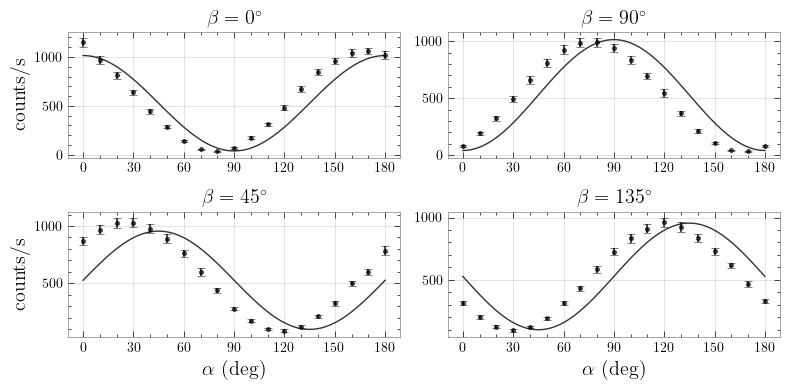

In [6]:
beta_grid = np.reshape(betas, (2,2))

fig, ax = plt.subplots(nrows=np.shape(beta_grid)[0], ncols=np.shape(beta_grid)[1], 
                       figsize=(8,4))

acont = np.linspace(0, 180, 100)

i = 0
for i in range(np.shape(beta_grid)[0]):
    for j in range(np.shape(beta_grid)[1]):

        k = 2 * j + i

        ax[i, j].errorbar(alphas, means[k, :], yerr=stds[k, :], 
                    fmt='o', 
                    ms=3, 
                    alpha=0.7,
                    capsize=3, 
                    color='black')

        ax[i, j].plot(acont, counts(np.pi * acont / 180, np.pi * (betas[k])/180, A=1950, C=40, thetal=np.pi/4, phim=0.5), 
                linewidth=1, color='black', 
                alpha=0.8)
        # NOTE either alpha or beta is off by about 12 deg (6 on the half waveplate), 
        # or some combination of the two

        ax[i, j].set_title(f'$\\beta = {betas[k]}^\\circ$')
        ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax[i, j].xaxis.set_minor_locator(ticker.MultipleLocator(10))

        ax[i, j].yaxis.set_major_locator(ticker.MultipleLocator(500))
        ax[i, j].yaxis.set_minor_locator(ticker.MultipleLocator(100))

        if j == 0: 
            ax[i, j].set_ylabel('counts/s')

        if i == 1:
            ax[i, j].set_xlabel('$\\alpha$ (deg)')

plt.tight_layout()
plt.savefig('./fig/acquisition.pdf')
plt.savefig('./fig/acquisition.png')